# Visualization templates

## result plot of a random forest

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import datetime
import matplotlib.pyplot as plt

In [4]:
# Get data and training/test split
temps = pd.read_csv('data/temps.csv')
temps = pd.get_dummies(temps)
X = temps.drop(['actual'], axis=1)
y = temps['actual']

train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [7]:
# Train model
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_labels)

In [10]:
# Make predictions
predictions = rf.predict(test_features)

In [22]:
# Dates of training values
months = X.iloc[:, feature_list.index('month')]

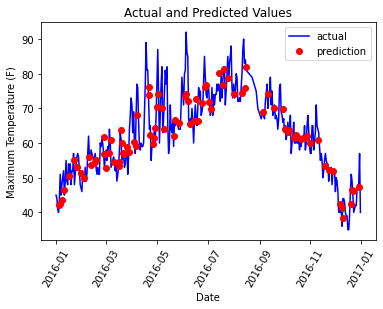

In [26]:
feature_list = list(X.columns)

# Dates of training values
months = X.iloc[:, feature_list.index('month')]
days = X.iloc[:, feature_list.index('day')]
years = X.iloc[:, feature_list.index('year')]

# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': y})

# Dates of predictions
months = test_features.iloc[:, feature_list.index('month')]
days = test_features.iloc[:, feature_list.index('day')]
years = test_features.iloc[:, feature_list.index('year')]

# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})

# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')

# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()

# Graph labels
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');